Лабораторная Работа 2
Нейросети

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import keras
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet_v2 import ResNet152V2
from keras import *
import random
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report


In [4]:
#load data and divide on train and test
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_def, y_train_def), (x_test_def, y_test_def) = fashion_mnist
(x_train, y_train), (x_test, y_test) = (x_train_def.copy(), y_train_def.copy()), (x_test_def.copy(), y_test_def.copy())

4431872/4422102 [==============================] - 0s 0us/step


Провизуализируем данные и параметры

In [5]:
labels = {
    0: "tshirt",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "sirt",
    7: "sneakers",
    8: "bag",
    9: "ankle boot"
}

Количество сэмплов в train/test выборке: 60000/10000 размерность: 28x28 


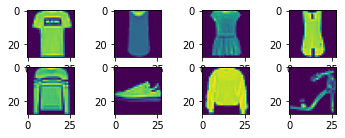

Метки: {0: 'tshirt', 1: 'trouser', 2: 'pullover', 3: 'dress', 4: 'coat', 5: 'sandal', 6: 'sirt', 7: 'sneakers', 8: 'bag', 9: 'ankle boot'} 

Распределение классов в тренировочной выборке
Класс 0 : 6000 сэмплов
Класс 1 : 6000 сэмплов
Класс 2 : 6000 сэмплов
Класс 3 : 6000 сэмплов
Класс 4 : 6000 сэмплов
Класс 5 : 6000 сэмплов
Класс 6 : 6000 сэмплов
Класс 7 : 6000 сэмплов
Класс 8 : 6000 сэмплов
Класс 9 : 6000 сэмплов


In [6]:
print(f"Количество сэмплов в train/test выборке: {x_train.shape[0]}/{x_test.shape[0]} размерность: {x_train.shape[1]}x{x_train.shape[2]} ")

#show samples 
for i in range(1,9):
  img_plt = x_train[i].reshape(28, 28)
  plt.subplot(440+int(i))
  plt.imshow(img_plt)
plt.show()

#define labels meaning
labels = {
    0: "tshirt",
    1: "trouser",
    2: "pullover",
    3: "dress",
    4: "coat",
    5: "sandal",
    6: "sirt",
    7: "sneakers",
    8: "bag",
    9: "ankle boot"
}
print(f"Метки: {labels} \n")


unique, counts = np.unique(y_train, return_counts=True)
print("Распределение классов в тренировочной выборке")
for item in np.asarray((unique, counts)).T:
  print(f"Класс {item[0]} : {item[1]} сэмплов")

Предобработка данных

In [7]:
def prepare_dataset(test_shape, train_shape):
  global x_train, y_train, x_test, y_test
  (x_train, y_train), (x_test, y_test) = (x_train_def.copy(), y_train_def.copy()), (x_test_def.copy(), y_test_def.copy())
  x_train, x_test = x_train / 255, x_test / 255
  x_train = x_train.reshape(test_shape)
  x_test = x_test.reshape(train_shape)
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

Некоторые вспомогательные функции

In [8]:
def get_labels(arr):
  return [np.argmax(arr[i]) for i in range(len(arr))]

Построим модель нейросети - обычного перцептрона, как базиса для оптимизации моделей

In [7]:
model = Sequential()
model.add(Dense(50, input_dim=784, activation="relu"))
model.add(Dense(10, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
  optimizer='adam', metrics=['accuracy'])

In [8]:
prepare_dataset((60000, 784), (10000, 784))
model.fit(x_train, y_train, batch_size=32, epochs=10)
classes = model.predict(x_test, batch_size=128)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5342 - accuracy: 0.8139
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4085 - accuracy: 0.8556
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3709 - accuracy: 0.8666
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3457 - accuracy: 0.8767
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3268 - accuracy: 0.8814
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3122 - accuracy: 0.8868
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3000 - accuracy: 0.8912
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2897 - accuracy: 0.8938
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.8968
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.275

In [9]:
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8765
Точность по метрике accuracy : 87.65% Значение функции ошибки 0.3537568747997284


In [10]:
test_classes = get_labels(y_test)
pred_classes  = get_labels(classes)
print(classification_report(test_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.79      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.76      0.84      0.80      1000
           5       0.93      0.98      0.95      1000
           6       0.74      0.60      0.67      1000
           7       0.94      0.95      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Итак, в случае обычного перцептрона в один скрытый слой мы получили точность по метрике accuracy 86.69% . Перейдем к сверточной нейросети.

**Сверточная нейросеть**

Для начала используем свертку с схемой из двух сверточных слоев и скрытым слоем на 100 нейронов:

---



In [11]:
model = Sequential()
model.add(Conv2D(6, kernel_size=3, activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(36, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        1980      
                                                                 
 flatten (Flatten)           (None, 4356)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               435700    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

Для обучения поделим тренировочный датасет в пропорции 20\80, чтобы выявить переобучение и контролировать качество модели. батч возьмем размером в 32 сэмпла.

In [12]:
prepare_dataset((60000, 28, 28, 1), (10000, 28, 28, 1))
history = model.fit(x_train, y_train, validation_split=0.20,batch_size=32, epochs=20, verbose=0)
classes = model.predict(x_test, batch_size=128)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
print(classification_report(test_classes, pred_classes))

313/313 [==============================] - 1s 4ms/step - loss: 0.5551 - accuracy: 0.9058
Точность по метрике accuracy : 90.57% Значение функции ошибки 0.5550668239593506
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.92      0.89      0.90      1000
           4       0.90      0.82      0.86      1000
           5       0.97      0.98      0.98      1000
           6       0.69      0.77      0.73      1000
           7       0.96      0.97      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Получаем сверткой значение  accuracy 90% на валидационном датасете и 96% на 10 эпохе на обучающем. Продолжаем тюнить нашу модель. Создадим функцию, которая бы строила график значения метрики от количества эпох. 

In [9]:
def plot_loss(history, epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(25,10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Точность на обучении')
  plt.plot(epochs_range, val_acc, label='Точность на валидации')
  plt.legend(loc='lower right')
  plt.title('Точность на обучающих и валидационных данных')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Потери на обучении')
  plt.plot(epochs_range, val_loss, label='Потери на валидации')
  plt.legend(loc='upper right')
  plt.title('Потери на обучающих и валидационных данных')
  plt.show()

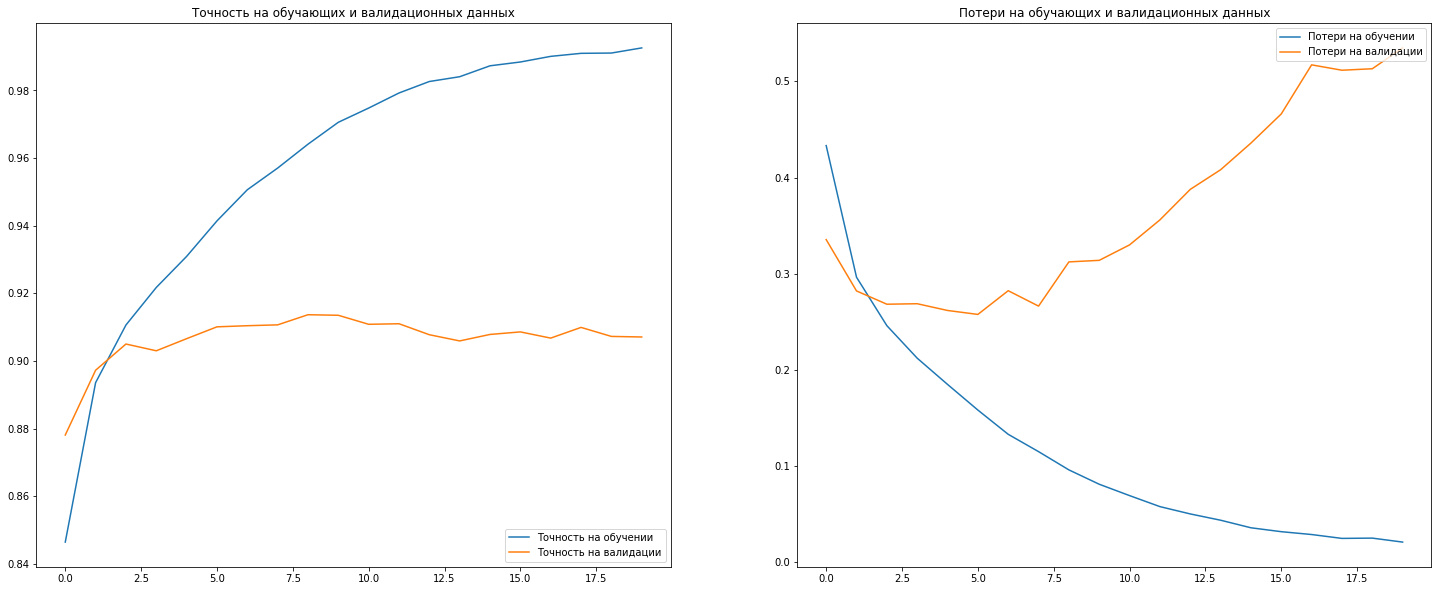

In [14]:
plot_loss(history, 20)

на графике мы видим, что при увеличении количества эпох модель переобучается - попытаемся это исправить. Добавим Batch Normaliation , который приводит батч к нормальному распределению и за счет этого защищает от переобучения.

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(36, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, input_dim=16, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
prepare_dataset((60000, 28, 28, 1), (10000, 28, 28, 1))
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4401 - accuracy: 0.8431 - val_loss: 0.3925 - val_accuracy: 0.8513
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3297 - accuracy: 0.8803 - val_loss: 0.3527 - val_accuracy: 0.8683
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2937 - accuracy: 0.8940 - val_loss: 0.3701 - val_accuracy: 0.8687
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2720 - accuracy: 0.8995 - val_loss: 0.2996 - val_accuracy: 0.8929
Epoch 5/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2534 - accuracy: 0.9058 - val_loss: 0.3234 - val_accuracy: 0.8847
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2352 - accuracy: 0.9125 - val_loss: 0.2936 - val_accuracy: 0.8913
Epoch 7/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2222 - accuracy: 0.9178 - val_loss: 0.3102 - val_accuracy:

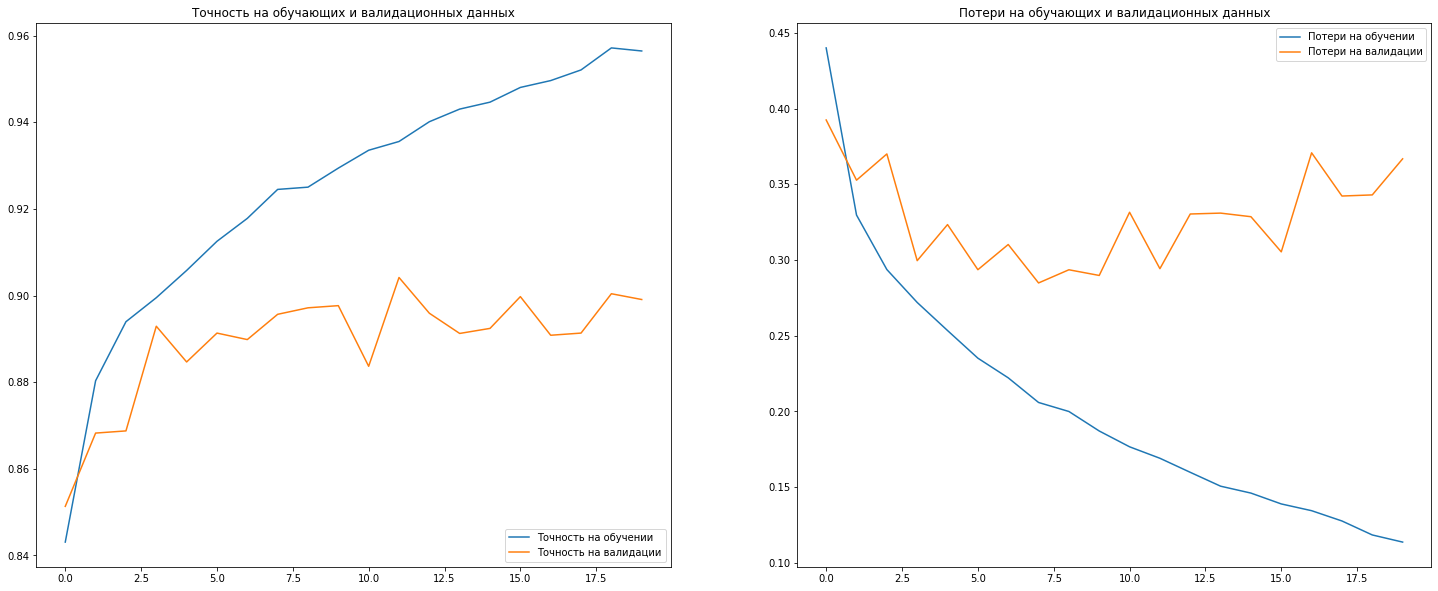

313/313 [==============================] - 2s 5ms/step - loss: 0.3967 - accuracy: 0.8926
Точность по метрике accuracy : 89.25% Значение функции ошибки 0.396655797958374
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1000
           1       0.99      0.98      0.99      1000
           2       0.81      0.90      0.85      1000
           3       0.89      0.92      0.90      1000
           4       0.85      0.80      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.79      0.59      0.68      1000
           7       0.96      0.92      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [16]:
plot_loss(history, 20)
classes = model.predict(x_test)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
print(classification_report(test_classes, pred_classes))

Слабый результат - Batch Normalization ухудшает результат. 

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(12, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),   
    tf.keras.layers.Conv2D(20, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(20, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, input_dim=16, activation='softmax')
])
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
prepare_dataset((60000, 28, 28, 1), (10000, 28, 28, 1))
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 12s 7ms/step - loss: 0.4899 - accuracy: 0.8225 - val_loss: 0.3385 - val_accuracy: 0.8752
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3276 - accuracy: 0.8816 - val_loss: 0.2910 - val_accuracy: 0.8934
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2806 - accuracy: 0.8966 - val_loss: 0.2547 - val_accuracy: 0.9071
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2521 - accuracy: 0.9077 - val_loss: 0.2381 - val_accuracy: 0.9098
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2328 - accuracy: 0.9126 - val_loss: 0.2348 - val_accuracy: 0.9147
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2175 - accuracy: 0.9192 - val_loss: 0.2231 - val_accuracy: 0.9194
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2037 - accuracy: 0.9235 - val_loss: 0.2167 - val_ac

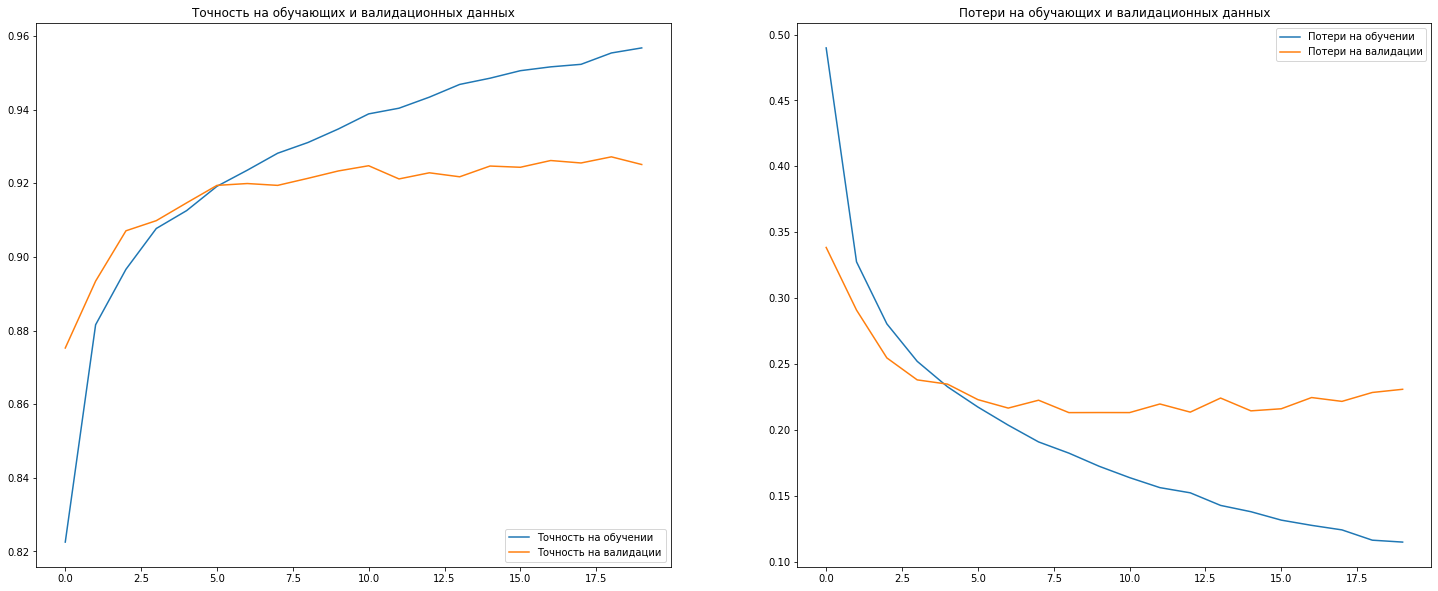

313/313 [==============================] - 2s 5ms/step - loss: 0.2602 - accuracy: 0.9220
Точность по метрике accuracy : 92.19% Значение функции ошибки 0.26018446683883667


In [18]:
plot_loss(history, 20)
classes = model.predict(x_test)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
report = classification_report(test_classes, pred_classes)

Вывод: в итоге мы получили модель с точнотсью распознавания по метрике accuracy 92%. Ниже пример работы модели. 

NameError: ignored

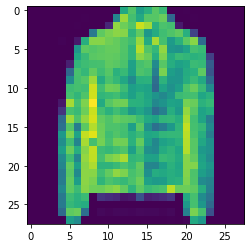

In [11]:
test_image_i = random.randint(0,1000)
image = x_test[test_image_i]
label = y_test[test_image_i]
plt.imshow(image.reshape((28,28)))
predicted_label = np.argmax(model.predict(np.array([image]))[0])
print(f"Expected: {labels[np.argmax(label)]}.   Actual: {labels[predicted_label]}")

Теперь можем заметить из отчета по классификации, что у классов 1, 5, 7, 8 и 9 высокие показатели обучаемости. Напротив, классы 0, 2, 3, 4, 6 дают низкий показатель. Для наглядности проанализируем изображения данных классов

In [19]:
bad_classes = []
good_classes = []
report_splitted = report.split('\n')[2:12]
for item in range(0, len(report_splitted)):
  report_splitted[item] = report_splitted[item].replace('     ','')[4:].split(' ')[2]
  if float(report_splitted[item])<0.95:
    bad_classes.append(str(item)+ ' ' + report_splitted[item])
  else:
    good_classes.append(str(item)+ ' ' + report_splitted[item])


tshirt
pullover
dress
coat
sirt


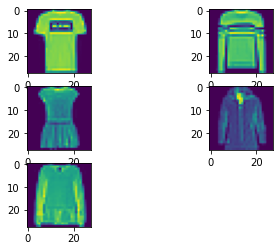

In [20]:
pln = 1
for t in bad_classes:
  print(labels[int(t[0])])
  for i in range(len(x_train)):
    if(np.argmax(y_train[i]) == int(t[0])):
      img_plt = x_train[i].reshape(28, 28)
      plt.subplot(320+pln)
      plt.imshow(img_plt)
      pln += 1
      break
plt.show()

Получаем, что классы с низким показателем качетсва распознавания (меньше 95%) - это представители верхней одежды. Это предсказуемо, так как у таких клаасов меньше различающихся фич и для их распознавания требуются более глубокии модели. 

trouser
sandal
sneakers
bag
ankle boot


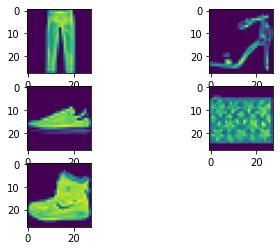

In [21]:
pln = 1
for t in good_classes:
  print(labels[int(t[0])])
  for i in range(len(x_train)):
    if(np.argmax(y_train[i]) == int(t[0])):
      img_plt = x_train[i].reshape(28, 28)
      plt.subplot(320+pln)
      plt.imshow(img_plt)
      pln += 1
      break
plt.show()

Здесь классы более различимы, поэтому и качество высокое. Обьединим выводы в графике для наглядности :

Text(0.5, 0, "['tshirt', 'pullover', 'dress', 'coat', 'sirt', 'trouser', 'sandal', 'sneakers', 'bag', 'ankle boot']")

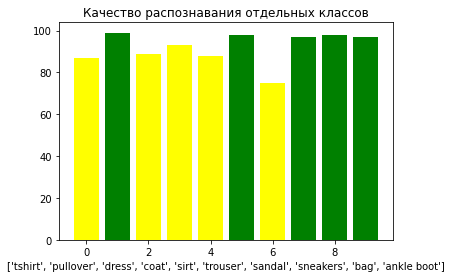

In [22]:
classes = [*[int(i[0]) for i in bad_classes] , *[int(i[0]) for i in good_classes]]
results = [*[float(i[2:])*100 for i in bad_classes] , *[float(i[2:])*100 for i in good_classes]]
plt.bar(classes, results, color=[*['yellow' for i in bad_classes] , *['green' for i in good_classes]])
plt.title("Качество распознавания отдельных классов")
plt.xlabel([labels[t] for t in classes])


**ResNet**

Попробуем использовать усложненную версию сверточной нейросети - ResNet (152V2). Она основывается на принципе "остаточных" слоев, и имеет структуру типа:

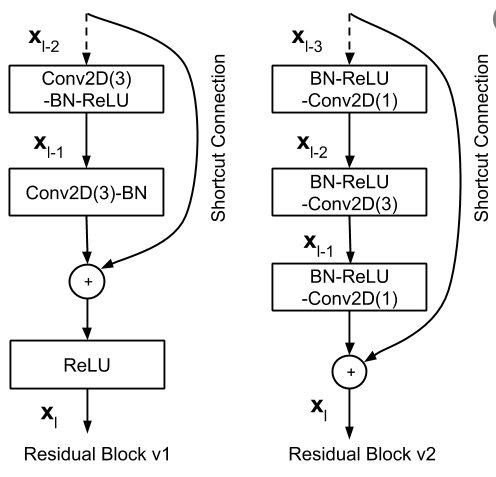

 Таким образом исчезает проблема затухающего градиента и повышается обучаемость начальных слоев сети. Сеть состоит из 152 слоев свертки и  имеет более 5млн обучаемых параметров. В выход модели подсоединим GlobalAveragePooling c Dropout-ом слой и выход на 10 нейронов с активацией softmax.
 Подготовим наш датасет к обучению. Для этого переведем изображения в 3-канальные и расширим до 32х32 формата, как того требует модель ResNet.

Проверка датасета: на картинке должно показываться:ankle boot


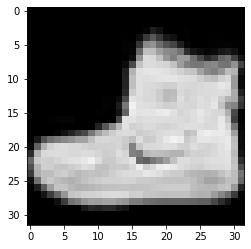

In [12]:
prepare_dataset((60000, 28, 28), (10000, 28, 28))
def transform_to_RGB(images):
  result = []
  for i in range(images.shape[0]):
    img = images[i]
    img2 = np.zeros( ( np.array(img).shape[0], np.array(img).shape[1], 3 ) )
    img2[:,:,0] = img 
    img2[:,:,1] = img
    img2[:,:,2] = img
    result.append(img2)
  return np.array(result)

def rescale(images, shape=(32,32)):
  x_modified = []
  for i in range(images.shape[0]):  
    x_modified.append(resize(images[i], (32, 32)))
  return  np.array(x_modified)

x_test = transform_to_RGB(x_test)
x_train = transform_to_RGB(x_train)
x_test = rescale(x_test)
x_train = rescale(x_train)
plt.imshow(x_train[0])
print(f"Проверка датасета: на картинке должно показываться:{labels[np.argmax(y_train[0])]}")

In [13]:
resnet_model = ResNet152V2(include_top=False, input_shape=(32,32,3))
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(10, activation= 'softmax')(x)
model = Model(inputs = resnet_model.input, outputs = predictions)
#resnet_model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


234561536/234545216 [==============================] - 6s 0us/step


In [14]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.1)
plot_loss(history, 20)
classes = model.predict(x_test)
info = model.evaluate(x_test, y_test)
print(f"Точность по метрике accuracy : {int(info[1]*10000)/100}% Значение функции ошибки {info[0]}")
pred_classes  = get_labels(classes)
report = classification_report(test_classes, pred_classes)

Epoch 1/10
540/540 [==============================] - 221s 358ms/step - loss: 0.0915 - accuracy: 0.8269 - val_loss: 0.1180 - val_accuracy: 0.8602
Epoch 2/10
540/540 [==============================] - 190s 352ms/step - loss: 0.0531 - accuracy: 0.8975 - val_loss: 0.0910 - val_accuracy: 0.8815
Epoch 3/10
540/540 [==============================] - 191s 353ms/step - loss: 0.0453 - accuracy: 0.9113 - val_loss: 0.0571 - val_accuracy: 0.8802
Epoch 4/10
540/540 [==============================] - 191s 353ms/step - loss: 0.0427 - accuracy: 0.9169 - val_loss: 0.0633 - val_accuracy: 0.8798
Epoch 5/10
540/540 [==============================] - 190s 352ms/step - loss: 0.0413 - accuracy: 0.9206 - val_loss: 0.0450 - val_accuracy: 0.9138
Epoch 6/10
540/540 [==============================] - 190s 353ms/step - loss: 0.0368 - accuracy: 0.9292 - val_loss: 0.0656 - val_accuracy: 0.8837
Epoch 7/10
540/540 [==============================] - 189s 350ms/step - loss: 0.0354 - accuracy: 0.9316 - val_loss: 0.0528 -

NameError: ignored

Результат - 92% по метрике accuracy. Итого с помощью модели из трех сверточных слоев и одного скрытого слоя получаем метрику 93% , а с помощью модели ResNet - 92.07%. 